# Project: Ford 2019 Go Biketrip Data Analysis (From Udacity https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)

# By ADESESAN ADEDOLAPO IBUKUNOLUWA

# Table Of Content
- Introduction
- Preliminary Data Wrangling
- Exploratory Data Analysis
-  Conclusion

# INTRODUCTION
In this project i would be analyzing dataset associated with bike trip in San Francisco bay area in year 2019 released by Ford in particular i would be finding answers to questions trends about the following

## Exploratory Questions
- What is the structure of your dataset?
- What is/are the main feature(s) of interest in your dataset?
- What features in the dataset do you think will help support your investigation into your feature(s) of interest

## Investigative Questions
- When are most trips taken, in terms of time of the day, day of the week,  or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?


## Preliminary Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
df_bike = pd.read_csv("201902-fordgobike-tripdata.csv")

 ## Exploratory Question 1 Answer
- There are 183412 columns abd 16 rows
- there are 3 data types; float, integers, objects

## Exploratory Question 2 Answer
- The main features of my data set are
1. duration_sec(trip duration)
2. User_type
3. Age
4. Gender
## Exploratory Question 3 Answer
- Features supporting my investigation
1. duration_sec(trip duration)
2. User_type
3. Age
4. Gender


In [3]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#What is the structure of your dataset
df_bike.shape

(183412, 16)

In [6]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# this cant work because the missing values are non-numeric
df_bike.fillna(df_bike.mean(), inplace = True)

C:\Users\User\AppData\Local\Temp/ipykernel_2924/3599026596.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bike.fillna(df_bike.mean(), inplace = True)


In [9]:
df_bike.dropna(inplace = True)

In [10]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

# Exploratory Data Analysis

In [11]:
#Find members age
df_bike['Age'] = 2019 - df_bike['member_birth_year']

In [12]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0


In [13]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

## Univariate Exploration
- Bike share distribution
- What is the user type distribution
- What is the highest and lowest age distribution of users
- What is the highest and lowest duration_sec of users
- What gender participated most in the trip

<function matplotlib.pyplot.show(close=None, block=None)>

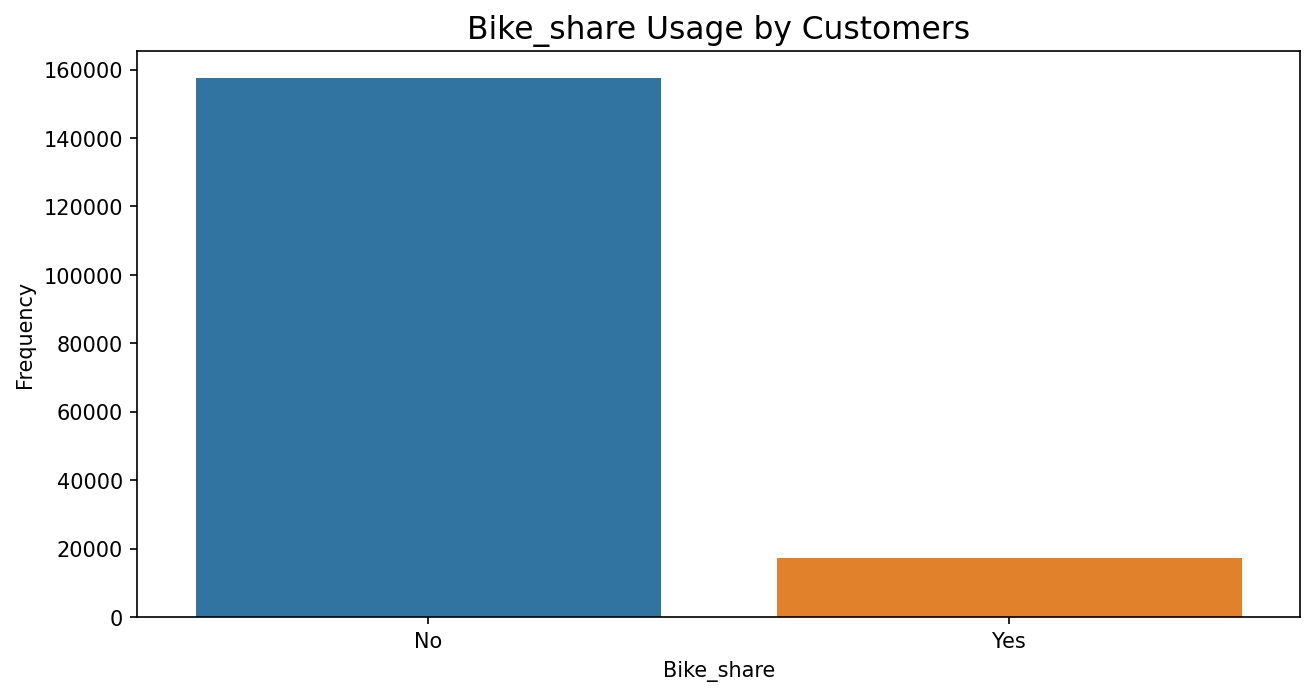

In [14]:
#Bike share trip distribution
plt.figure(figsize = (10,5), dpi = 150)
plot = sns.countplot(data = df_bike, x = 'bike_share_for_all_trip')
plt.title("Bike_share Usage by Customers", size = 15)
plt.xlabel('Bike_share')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

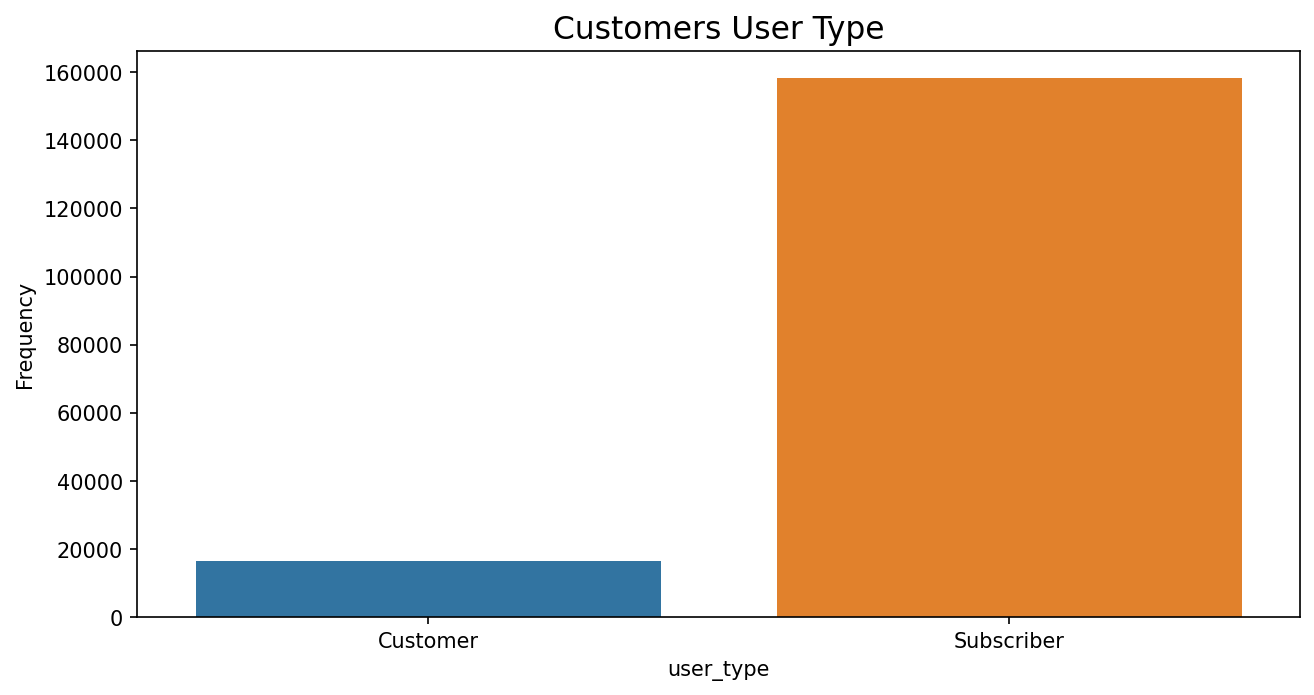

In [15]:
#What is the user type distribution
plt.figure(figsize = (10,5), dpi = 150)
plot = sns.countplot(data = df_bike, x = 'user_type')
plt.title("Customers User Type", size = 15)
plt.xlabel('user_type')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

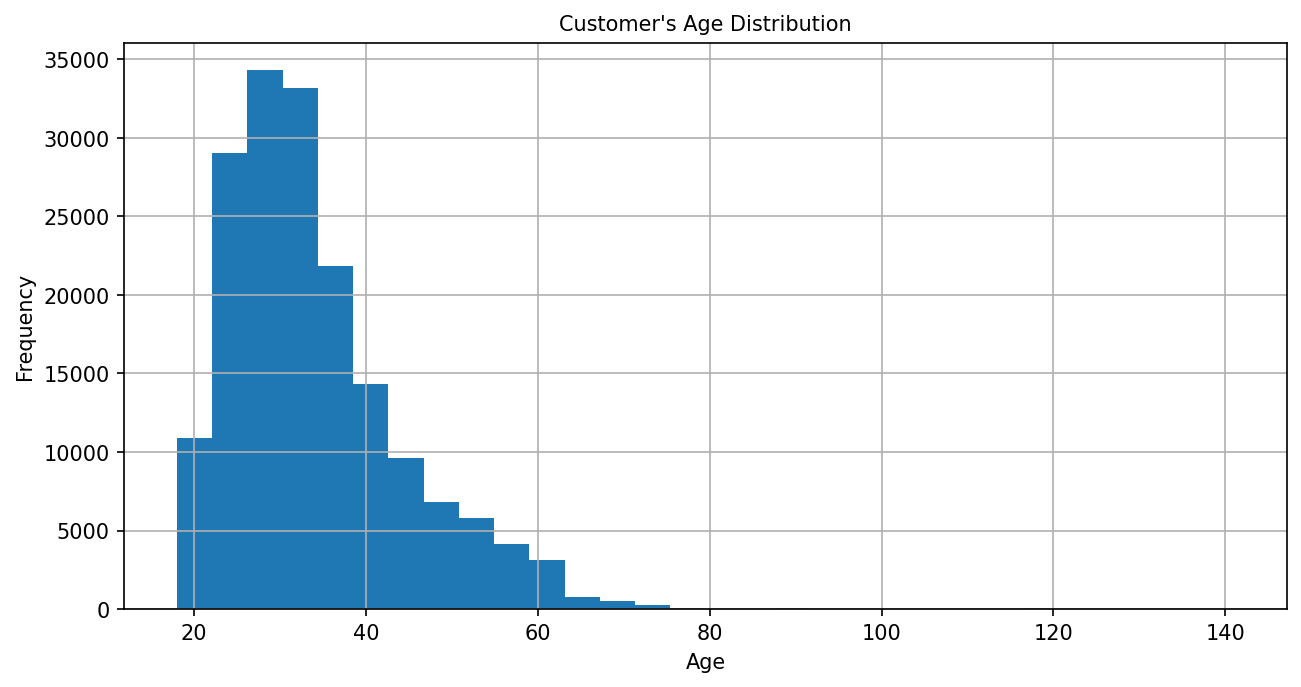

In [16]:
#What is the highest and lowest age distribution of users
plt.figure(figsize = (10,5), dpi = 150)
df_bike['Age'].hist(bins = 30)
plt.title("Customer's Age Distribution", size = 10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

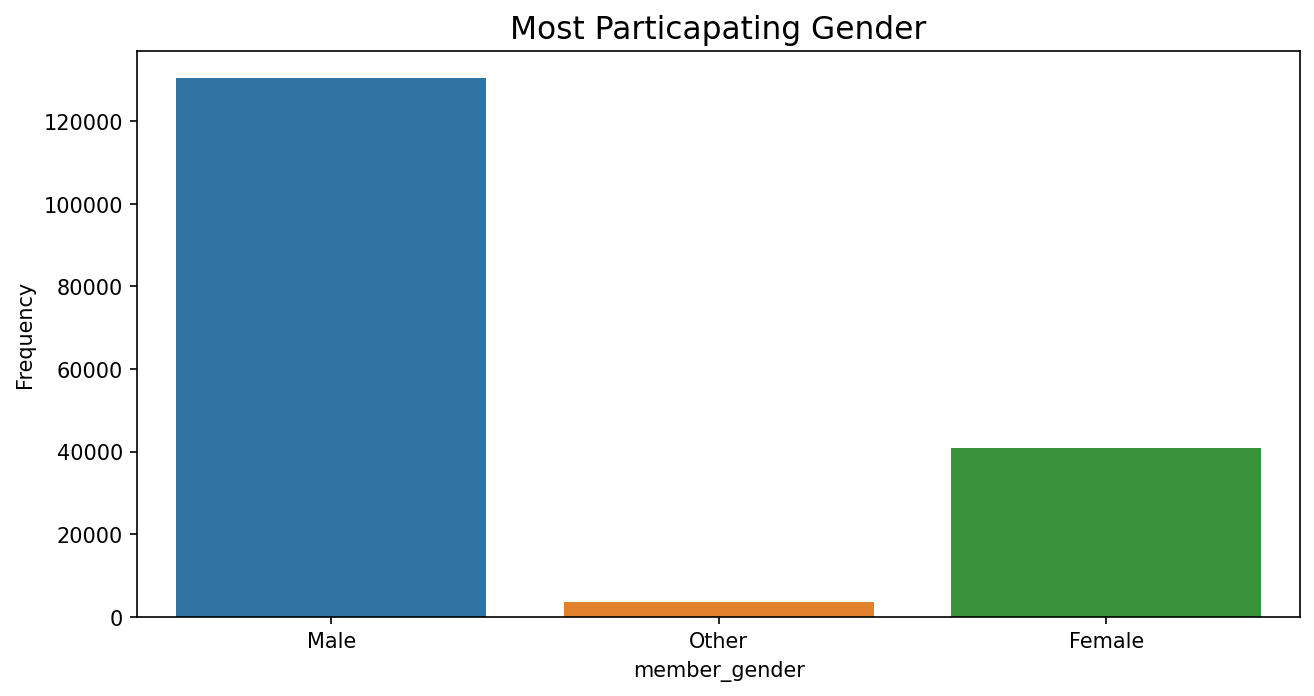

In [17]:
#What gender participated most in the trip
plt.figure(figsize = (10,5), dpi = 150)
plot = sns.countplot(data = df_bike, x = 'member_gender')
plt.title("Most Particapating Gender", size = 15)
plt.xlabel('member_gender')
plt.ylabel('Frequency')
plt.show

## Bivariate Exploration
- What is the relationship between age and user_type
- What effect does gender has on the duration
- What is the effect of age on duration of trip
- What relationship exists between age and gender has on the trip

<AxesSubplot:xlabel='user_type', ylabel='Age'>

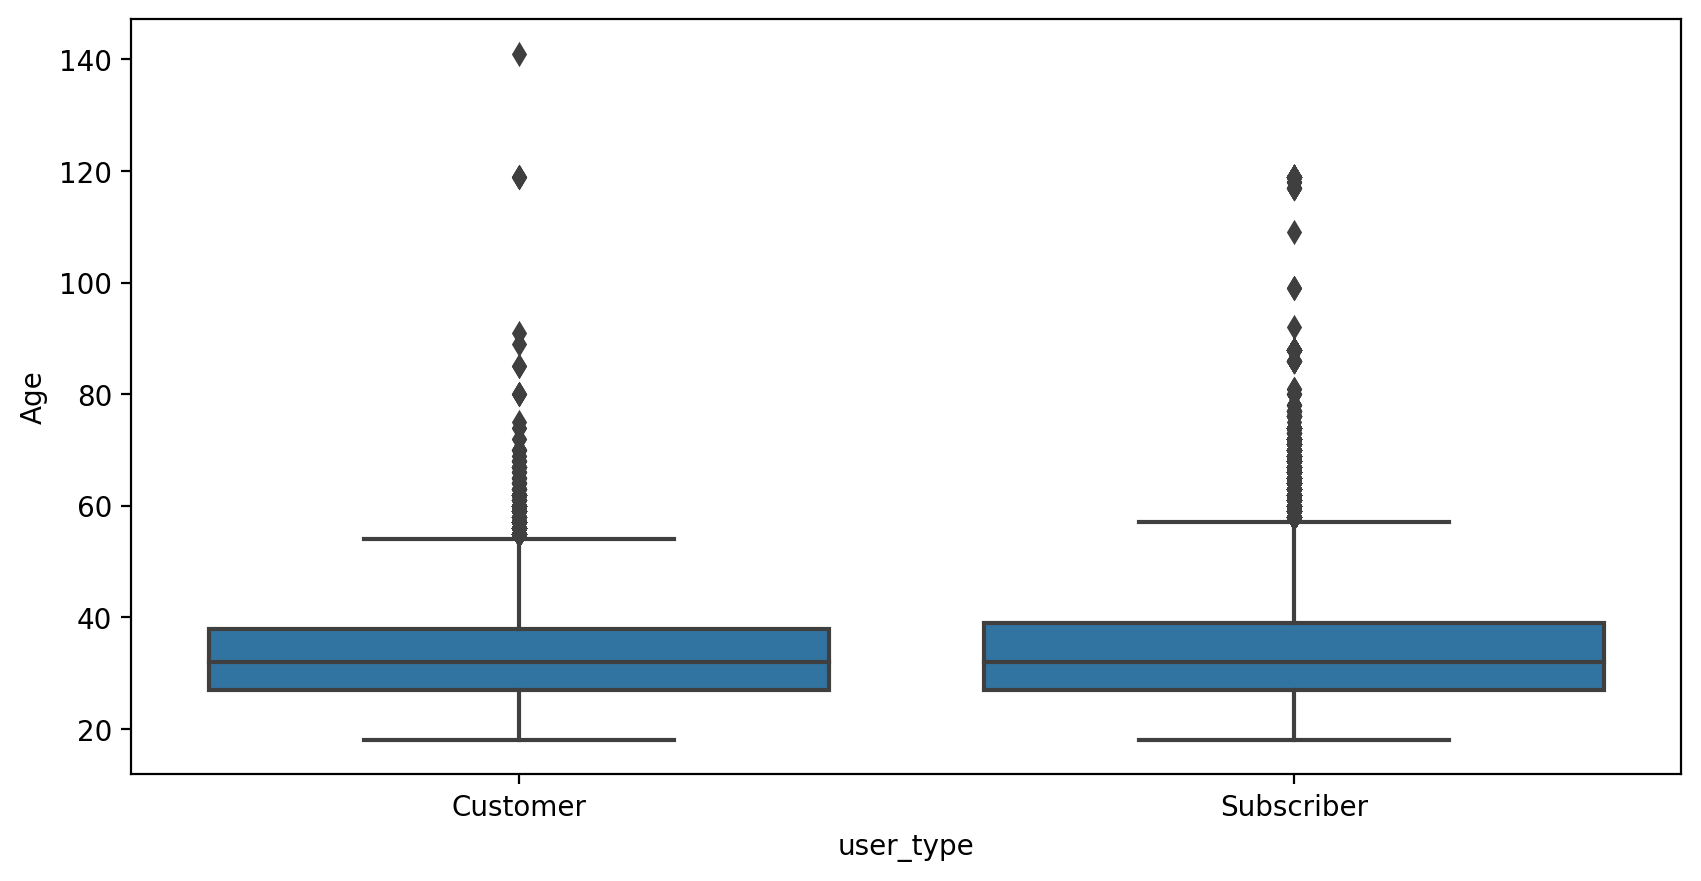

In [18]:
#What is the relationship between age and user_type
plt.figure(figsize = (10,5), dpi = 200)
base_color = sns.color_palette()[0]
sns.boxplot(data = df_bike, x = 'user_type', y = 'Age', color = base_color)

#### From the above, there are more older customers than subscribers which can also mean most of the riders are old time customers 

<AxesSubplot:xlabel='member_gender', ylabel='Age'>

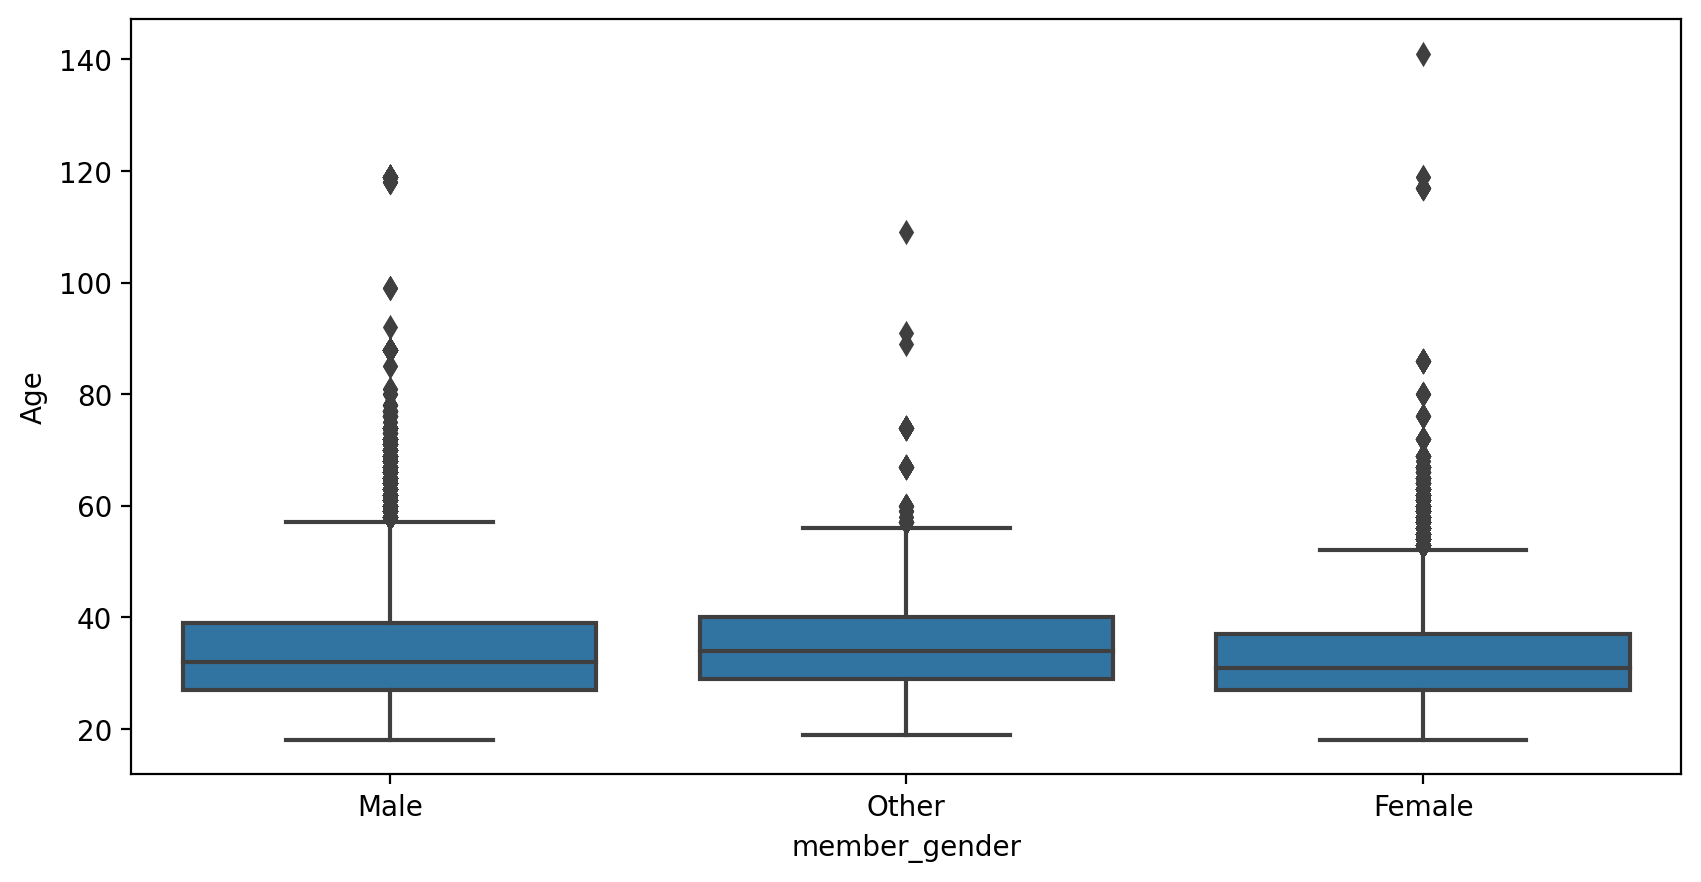

In [19]:
#What relationship exists between age and gender has on the trip
plt.figure(figsize = (10,5), dpi = 200)
base_color = sns.color_palette()[0]
sns.boxplot(data = df_bike, x = 'member_gender', y = 'Age', color = base_color)

#### From the above visualization,there are more older female riders than male riders

## Research Question 1
- When are most trips taken, in terms of time of the day, day of the week, or month of the year?

In [20]:
# Convert start_time to date time object
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [21]:
#Extract date using dt.date
df_bike['start_time'].dt.date
df_bike['end_time'].dt.date

0         2019-03-01
2         2019-03-01
3         2019-03-01
4         2019-03-01
5         2019-03-01
             ...    
183407    2019-02-01
183408    2019-02-01
183409    2019-02-01
183410    2019-02-01
183411    2019-02-01
Name: end_time, Length: 174952, dtype: object

In [22]:
df_bike['Start_date'] = df_bike['start_time'].dt.date
df_bike['End_date'] = df_bike['end_time'].dt.date

In [23]:
# Extract time using dt.time
df_bike['start_time'].dt.time
df_bike['end_time'].dt.time

0         08:01:55.975000
2         05:24:08.146000
3         04:02:36.842000
4         00:20:44.074000
5         00:19:51.760000
               ...       
183407    00:12:50.034000
183408    00:10:48.502000
183409    00:08:27.220000
183410    00:07:54.287000
183411    00:04:52.058000
Name: end_time, Length: 174952, dtype: object

In [24]:
df_bike['start_time'] = df_bike['start_time'].dt.time
df_bike['end_time'] = df_bike['end_time'].dt.time

In [25]:
df_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,Start_date,End_date
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,2019-02-28,2019-03-01
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,2019-02-28,2019-03-01
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,2019-02-28,2019-03-01
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,2019-02-28,2019-03-01
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,2019-02-28,2019-03-01
6,1147,23:55:35.104000,00:14:42.588000,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,36.0,2019-02-28,2019-03-01
7,1615,23:41:06.766000,00:08:02.756000,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,30.0,2019-02-28,2019-03-01
8,1570,23:41:48.790000,00:07:59.715000,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,31.0,2019-02-28,2019-03-01
9,1049,23:49:47.699000,00:07:17.025000,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,27.0,2019-02-28,2019-03-01
10,458,23:57:57.211000,00:05:35.435000,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,23.0,2019-02-28,2019-03-01


In [26]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [27]:
df_bike['duration_hour'] = df_bike['duration_sec'] // 3600

In [28]:
df_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,Start_date,End_date,duration_hour
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,2019-02-28,2019-03-01,14
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,2019-02-28,2019-03-01,17
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,2019-02-28,2019-03-01,10
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,2019-02-28,2019-03-01,0
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,2019-02-28,2019-03-01,0
6,1147,23:55:35.104000,00:14:42.588000,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,36.0,2019-02-28,2019-03-01,0
7,1615,23:41:06.766000,00:08:02.756000,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,30.0,2019-02-28,2019-03-01,0
8,1570,23:41:48.790000,00:07:59.715000,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,31.0,2019-02-28,2019-03-01,0
9,1049,23:49:47.699000,00:07:17.025000,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,27.0,2019-02-28,2019-03-01,0
10,458,23:57:57.211000,00:05:35.435000,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,23.0,2019-02-28,2019-03-01,0


In [29]:
df_bike['duration_day'] = df_bike['duration_sec']//(24*3600)

In [30]:
df_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,Start_date,End_date,duration_hour,duration_day
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,35.0,2019-02-28,2019-03-01,14,0
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,47.0,2019-02-28,2019-03-01,17,0
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,30.0,2019-02-28,2019-03-01,10,0
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,45.0,2019-02-28,2019-03-01,0,0
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,60.0,2019-02-28,2019-03-01,0,0
6,1147,23:55:35.104000,00:14:42.588000,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983.0,Female,No,36.0,2019-02-28,2019-03-01,0,0
7,1615,23:41:06.766000,00:08:02.756000,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989.0,Male,No,30.0,2019-02-28,2019-03-01,0,0
8,1570,23:41:48.790000,00:07:59.715000,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988.0,Other,No,31.0,2019-02-28,2019-03-01,0,0
9,1049,23:49:47.699000,00:07:17.025000,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992.0,Male,No,27.0,2019-02-28,2019-03-01,0,0
10,458,23:57:57.211000,00:05:35.435000,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,5318,Subscriber,1996.0,Female,Yes,23.0,2019-02-28,2019-03-01,0,0


In [31]:
df_bike['duration_week'] = df_bike['duration_day']/ 7

In [32]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,Start_date,End_date,duration_hour,duration_day,duration_week
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35.0,2019-02-28,2019-03-01,14,0,0.0
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47.0,2019-02-28,2019-03-01,17,0,0.0
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30.0,2019-02-28,2019-03-01,10,0,0.0
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,2019-02-28,2019-03-01,0,0,0.0
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60.0,2019-02-28,2019-03-01,0,0,0.0


<AxesSubplot:xlabel='duration_hour', ylabel='Age'>

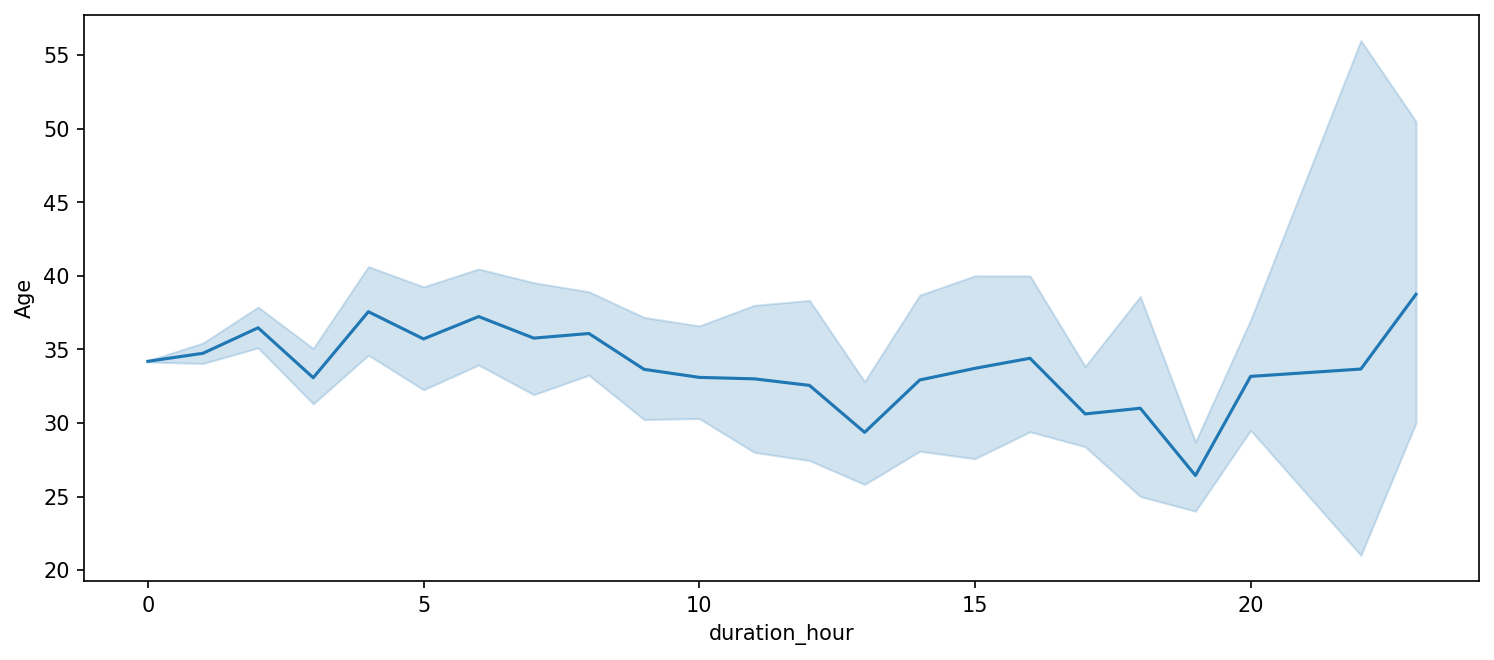

In [38]:
#What is the effect of age on duration of trip
plt.figure(figsize = (12,5), dpi = 150)
base_color = sns.color_palette()[0]
sns.lineplot(data = df_bike, x = 'duration_hour', y = 'Age', color = base_color)

#### Looking at the above visualization, riders between age 30-38 spends less time on riding, while riders below 30year spends more time

<AxesSubplot:xlabel='member_gender', ylabel='duration_hour'>

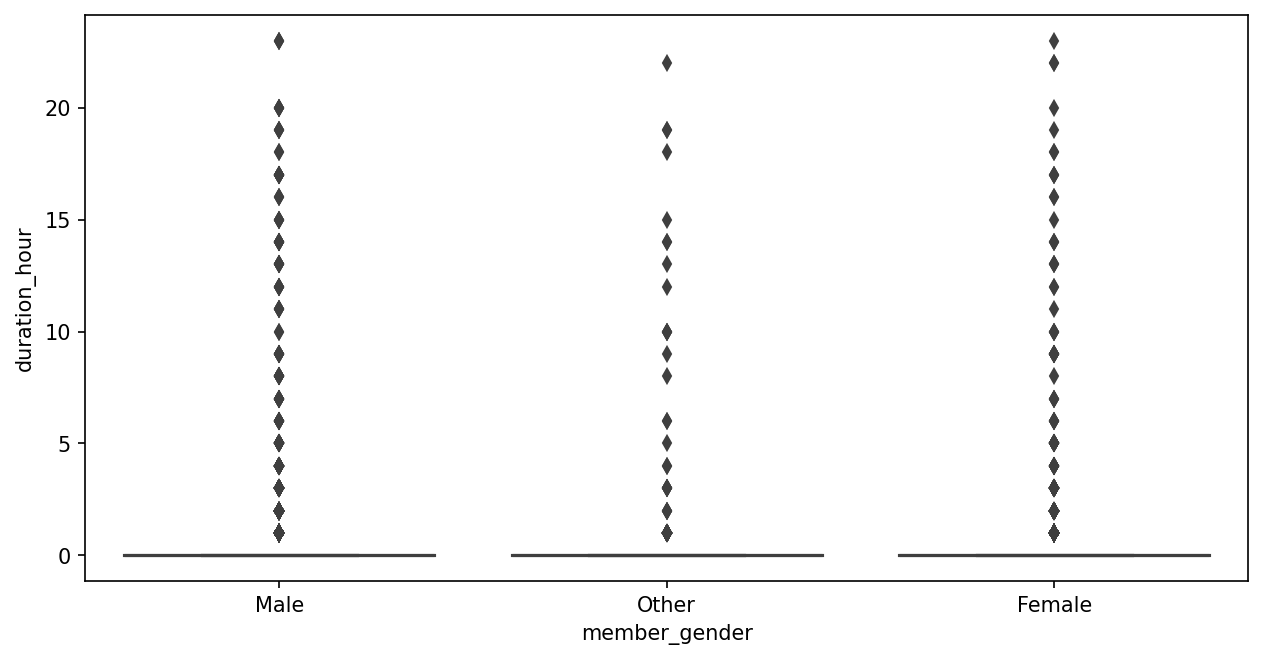

In [55]:
#What effect does gender has on the duration
plt.figure(figsize = (10,5), dpi = 150)
base_color = sns.color_palette()[0]
sns.boxplot(data = df_bike, x = 'member_gender', y = 'duration_hour', color = base_color)

#### From the above, both genders has almost the same durations, which means duration is not affected by gender

# Research Question 2
## How long does the average trip take?

In [23]:
#Average trip in seconds
avg_duration = df_bike['duration_sec'].mean()
print('An average trip takes',avg_duration, 'seconds')

An average trip takes 704.0027436096758 seconds


In [41]:
#Average trip in hour
avg_duration_hr = df_bike['duration_hour'].mean()
print('An average trip takes',avg_duration_hr, 'hours')

An average trip takes 0.021971740820339293 hours


# Research Question 3
### Does the above depend on if a user is a subscriber or customer?

<function matplotlib.pyplot.show(close=None, block=None)>

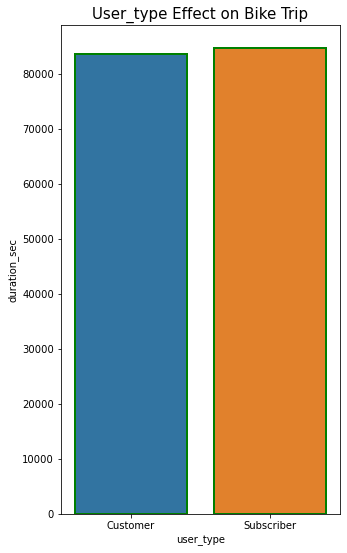

In [28]:
df_bike = df_bike.groupby(by = 'user_type').max()[['duration_sec']].sort_values(by = ['duration_sec'], ascending = True).reset_index()
fig = plt.figure(figsize = (5,9))
plt.title("User_type Effect on Bike Trip", size = 15)
axis = sns.barplot(data = df_bike, y = "duration_sec", x = 'user_type', linewidth = 2, edgecolor = 'green')
plt.xlabel('user_type')
plt.ylabel('duration_sec')
plt.show

#### From the above, there's a close relationship between customers and subscrabers with respect to duration, which means the amount of time require to complete a race is not determined based on if the rider is customer or a subscriber

## Multivariate Exploration
- What relationship exists among the variables of the dataset


<AxesSubplot:>

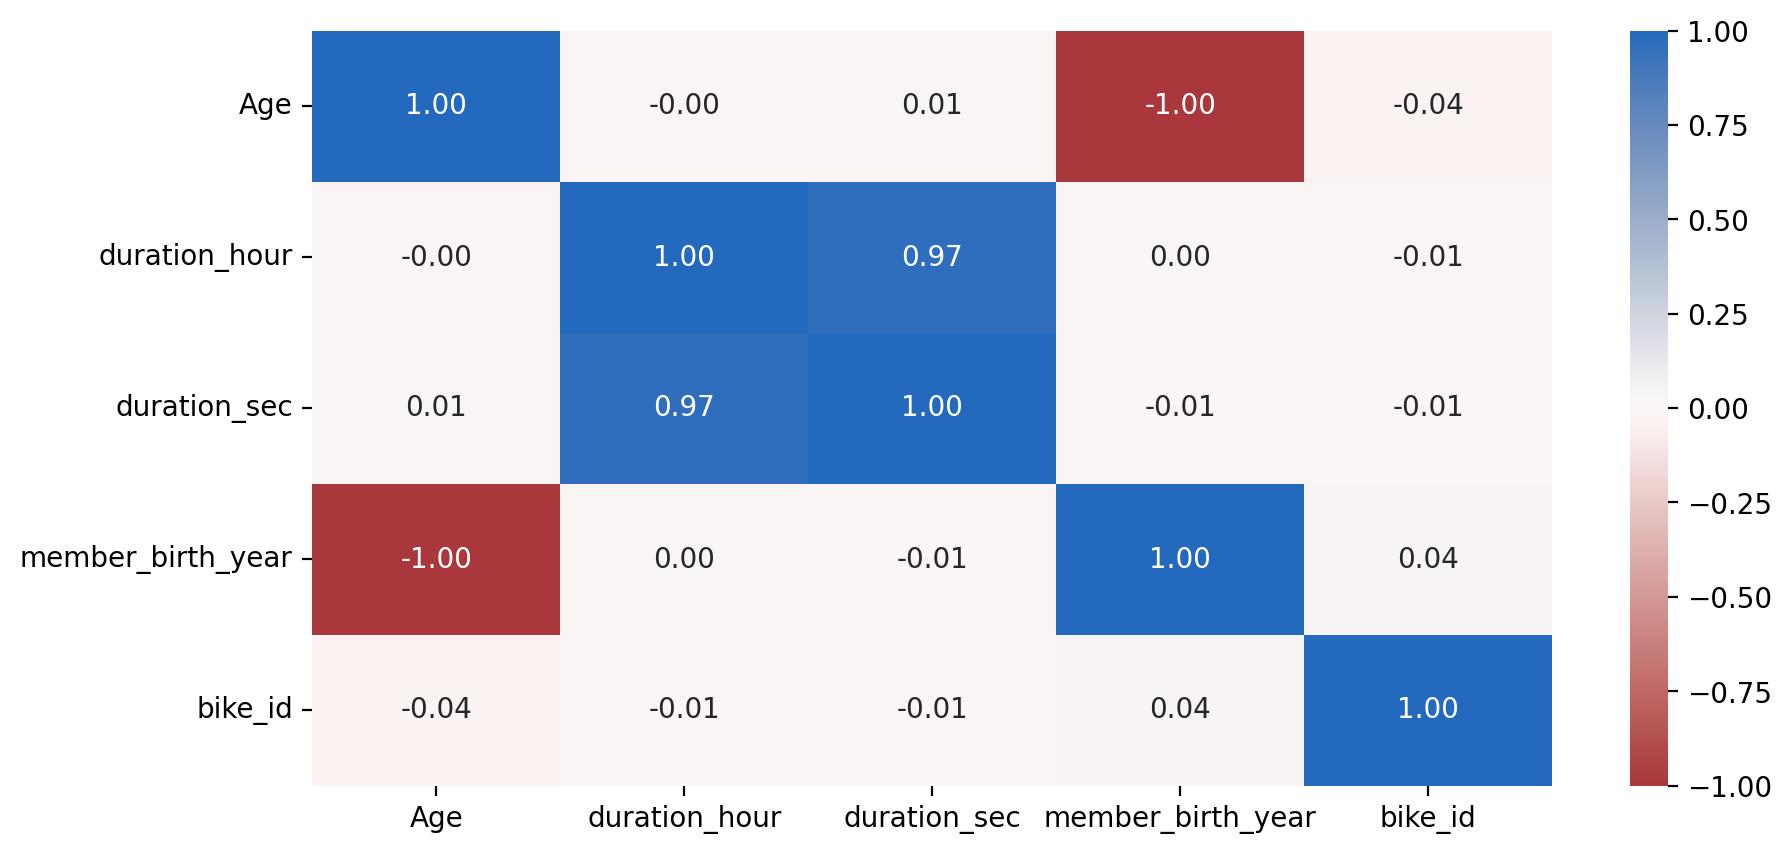

In [57]:
num_var = ['Age', 'duration_hour','duration_sec', 'member_birth_year', 'bike_id']
plt.figure(figsize = (10,5), dpi = 200)

sns.heatmap(df_bike[num_var].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

#### The above visualization was used to determine correleation among variables,the following was observed:
1. There's little to no correlation for any variaable with respect to duration
2. There's a strong correlation between the start_station_longituden and end_station_longitude

# Conclusion
- Most of the users are male and subscribers
- Days couldnot be well represented as some of the munutes or hous were below 30min/1hr
- There are more older female than male depending on the age distribution
- Most of the users are male

# Limitations
- Some of the ages were biased as there ages above 100 which doesnt seem to go in line with bikers age requirements(health wise)
- Some of the datas were missing 